# Navigation

1.  [Earthquakes](#quakes)

    * [Data Exploration](#data-exploration)
    * [ACF](#acf)
    * [Relationship between x(t) and x(t-1)](#relationship-between-xt-and-xt-1)
    * [ACF of Residuals](#acf-of-residuals)

2.  [Cardiovascular Mortality Rate](#cmort)

    * [Data Exploration](#data-exploration-1)
    * [First Differences](#first-differences)
    * [ACF](#acf-1)
    * [Relationship between x(t) and x(t-1)](#relationship-between-xt-and-xt-1-1)
    * [ACF of Residuals](#acf-of-residuals-1)

# Quakes

This data is the annual number of earthquakes worldwide with a magnitude greater than 7.0 on the seismic scale.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

file_url = 'https://online.stat.psu.edu/stat510/sites/stat510/files/L01/quakes.dat'

# Format data
x = pd.read_csv(file_url, delim_whitespace=True, header=None)
x = x.to_numpy().flatten()
x = x[~np.isnan(x)]

C:\Users\atama\AppData\Local\Temp\ipykernel_39924\1672065798.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x = pd.read_csv(file_url, delim_whitespace=True, header=None)


## Data Exploration

First we plot the time series

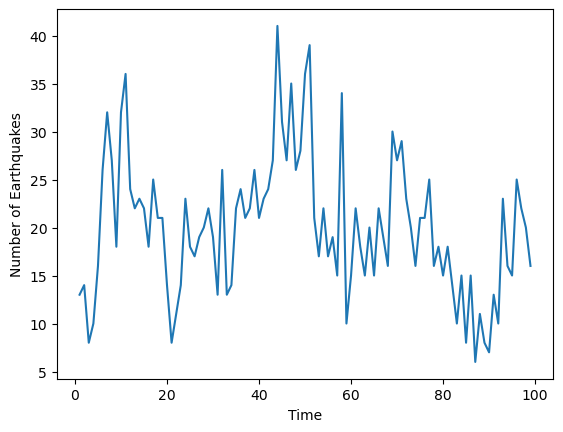

In [3]:
plt.plot(range(1, len(x) + 1), x)
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.show()

## ACF

Then we plot the ACF of the lags

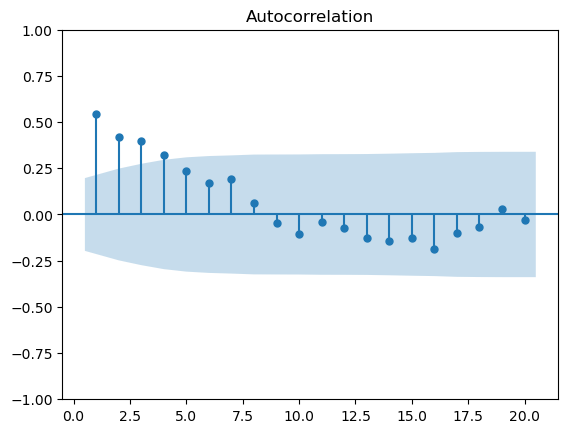

In [4]:
plot_acf(x, lags = range(1, 21));

Unlike in R where the significant lags were 1-5, the lags here are only 1-4. This likely has to do with how the confidence bands are calculated.

The significant ACF suggests that $x_t$ is not independent over time.

## Relationship between x(t) and x(t-1)

Then we plot the number of earthquakes against its lag(1). Let's look at the linear relationship between $x_t$ and its first lag $x_{t-1}$

In [5]:
# Create lag variable
lag1 = np.insert(x[:-1], 0, np.nan)

X = sm.add_constant(lag1)
ar1fit = sm.OLS(x, X, missing='drop').fit()

print(ar1fit.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     40.60
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           6.47e-09
Time:                        01:25:23   Log-Likelihood:                -315.62
No. Observations:                  98   AIC:                             635.2
Df Residuals:                      96   BIC:                             640.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1907      1.819      5.052      0.0

The model shows statistical significance with an $R^2$ value of 0.2972 - indicating that the lag(1) explains about 30% of the variance in a given day's number of earthquakes can be explained by the number of earthquakes on the previous day.

Let's look at this in a line graph

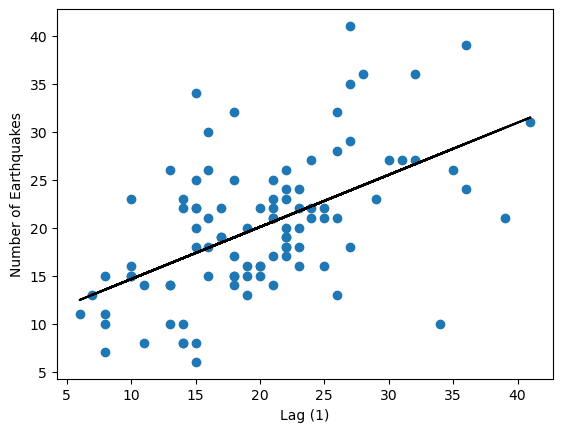

In [6]:
# Move to dataframe and drop na
df = pd.DataFrame({'x': x, 'lag1': lag1})
df = df.dropna()

pred = ar1fit.fittedvalues

plt.scatter(df['lag1'], df['x'])
plt.plot(df['lag1'], pred, color = 'black')
plt.xlabel('Lag (1)')
plt.ylabel('Number of Earthquakes')
plt.show()

## ACF of residuals

Next we check the autocorrelation function of the residuals to check if the model has properly captured the time dependence - good models should leave uncorrelated residuals.

Significant ACF means the model is missing structure; residuals should behave like random noise (white noise).

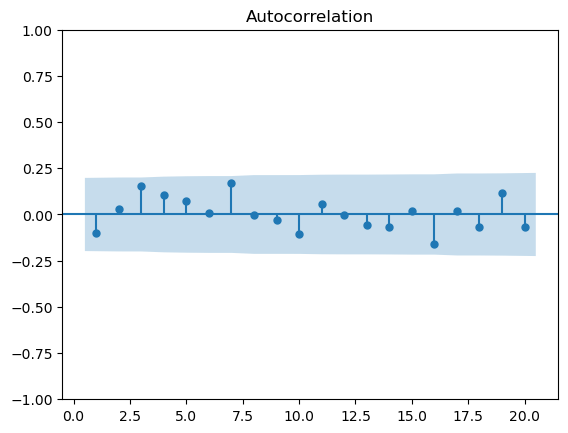

In [7]:
plot_acf(ar1fit.resid, lags = range(1, 21));

There are no significant ACF values for the residuals - meaning no ARIMA terms, more lags, or transformations should be necessary.

# CMort

This data concerns the weekly cardiovascular mortality rate in Los Angeles County.

In [8]:
x = pd.read_csv('https://online.stat.psu.edu/stat510/sites/stat510/files/L01/cmort.dat', delim_whitespace = True, header = None)
x = x.to_numpy().flatten()
x = x[~np.isnan(x)]
df = pd.DataFrame({'mortality_rate': x, 'Time': range(1, len(x) + 1)})

C:\Users\atama\AppData\Local\Temp\ipykernel_39924\79082574.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x = pd.read_csv('https://online.stat.psu.edu/stat510/sites/stat510/files/L01/cmort.dat', delim_whitespace = True, header = None)


## Data exploration

First we plot the time series

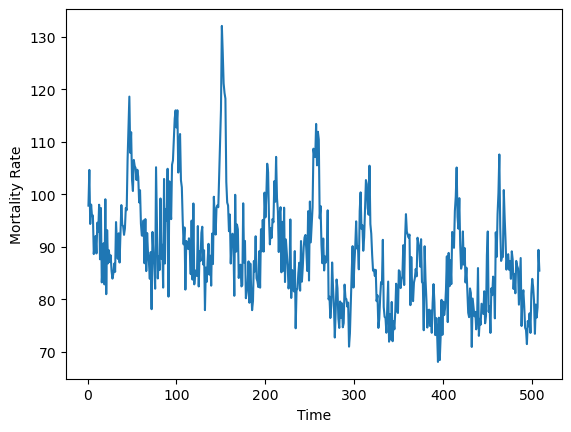

In [9]:
plt.plot(df['Time'], df['mortality_rate'])
plt.xlabel('Time')
plt.ylabel('Mortality Rate')
plt.show()

There is a slight downward trend, so the series may not be stationary.

## First differences

To create a (possibly) stationary series, we’ll examine the first differences.

In [10]:
df['mortdiff'] = df['mortality_rate'].diff()

Let's see what this looks like

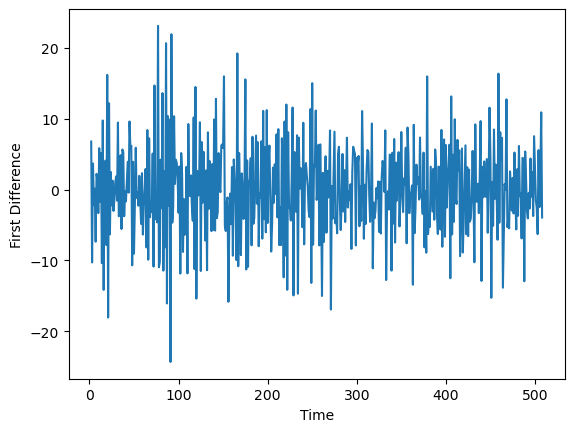

In [11]:
plt.plot(df['Time'], df['mortdiff'])
plt.xlabel('Time')
plt.ylabel('First Difference')
plt.show()

This looks a lot more stationary

## ACF

Now we look at the autocorrelation function of the first difference

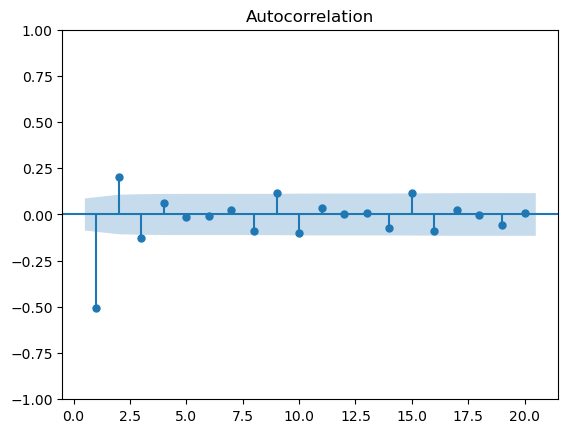

In [12]:
plot_acf(df['mortdiff'].dropna(), lags = range(1, 21));

This looks like the pattern of an AR(1) with a negative lag 1 autocorrelation.

## Relationship between x(t) and x(t-1)

In [13]:
df['lag1'] = df['mortdiff'].shift(1)
df = df.dropna()

X = sm.add_constant(df['lag1'])

ar1fit = sm.OLS(df['mortdiff'], X).fit()
print(ar1fit.summary())

                            OLS Regression Results                            
Dep. Variable:               mortdiff   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           2.34e-34
Time:                        01:25:44   Log-Likelihood:                -1608.7
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     504   BIC:                             3230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0463      0.259     -0.179      0.8

This shows a negative linear relationship between $x_t$ and its first lag. The R-squared value of 0.255 means that the difference between the previous mortality rate of a day and the day before that explains about 26% of the variance in the difference between mortality rate of the present day and the previous day.

  * More concisely: how much the previous day's change explains the current day's change

## ACF of Residuals

Now we check the autocorrelation function of the residuals

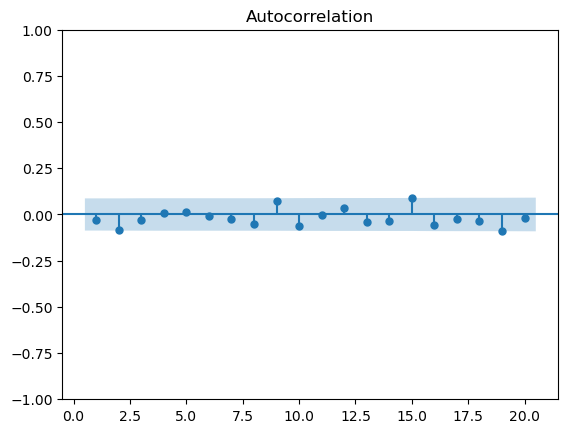

In [14]:
plot_acf(ar1fit.resid, lags = range(1, 21));

No significant ACF of residuals - meaning the model has successfully captured the time dependence in the data, and the residuals now behave like white noise (i.e., uncorrelated, random error)